# 대선자료 시각화

In [1]:
# 모듈 불러오기
import pandas as pd

In [2]:
# Data 불러오기
election = pd.read_csv('../Data/election_2022.csv')
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
0,서울특별시,종로구,129968,100629,46130,49172,3115
1,서울특별시,중구,111448,84998,38244,42906,2310
2,서울특별시,용산구,199077,152068,60063,85047,4374
3,서울특별시,성동구,252087,197240,84411,103880,5365
4,서울특별시,광진구,303582,235471,109922,113733,7072


In [3]:
# 기본 통계량 확인하기 : 갯수, 평균, 표준편차, 1~4사분위수, 최대값 등등
election.describe()

,선거인수,투표수,이재명,윤석열,심상정
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,176570.540323,136147.838710,64479.104839,65566.290323,3215.532258
std,141049.731983,108569.706317,56875.864428,56766.365763,2893.695797
min,8141.000000,6653.000000,1590.000000,2052.000000,109.000000
25%,47671.500000,39215.750000,17363.000000,18223.000000,709.000000
50%,154353.500000,114654.000000,48797.000000,50341.000000,2617.500000
75%,265099.250000,204189.250000,99830.750000,101949.750000,5041.000000
max,703896.000000,542027.000000,285227.000000,275155.000000,13249.000000


In [4]:
# 컬럼명 확인하기
election.columns

Index(['광역시도', '시군구', '선거인수', '투표수', '이재명', '윤석열', '심상정'], dtype='object')

In [5]:
# dimesion 확인하기
election.shape

(248, 7)

In [6]:
# 컬럼별 자료형 확인하기
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   광역시도    248 non-null    object
 1   시군구     248 non-null    object
 2   선거인수    248 non-null    int64 
 3   투표수     248 non-null    int64 
 4   이재명     248 non-null    int64 
 5   윤석열     248 non-null    int64 
 6   심상정     248 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 13.7+ KB


In [7]:
# 전체컬럼에서 대해 NaN 확인
election.isnull().any()
# election.isnull().sum()

광역시도    False
시군구     False
선거인수    False
투표수     False
이재명     False
윤석열     False
심상정     False
dtype: bool

In [8]:
election['electionSum'] = election.iloc[:,4:].sum(axis=1)
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417
1,서울특별시,중구,111448,84998,38244,42906,2310,83460
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727


In [9]:
election['electionRatio'] = round(election['electionSum'] / election['투표수'] * 100,2)
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99


In [10]:
# csv로 저장하기
election.to_csv("../Data/election2022_1st.csv",index=False)

---
### 광역시별 투표율을 Pie Chart로 표현하기

In [11]:
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99


In [12]:
election.tail()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
243,경상남도,산청군,31645,24913,7125,16607,464,24196,97.12
244,경상남도,거창군,53049,41399,11963,27254,895,40112,96.89
245,경상남도,합천군,39768,31270,6911,22742,511,30164,96.46
246,제주특별자치도,제주시,408552,296826,157695,122084,10007,289786,97.63
247,제주특별자치도,서귀포시,155802,112823,55435,50930,3591,109956,97.46


In [13]:
# pivot을 이용하여 광역시별 투표수를 합계로 그룹화하여 집계한다.
elec_sum = election.pivot_table("투표수",index='광역시도',aggfunc=sum)
elec_sum.head()

,투표수
광역시도,
강원도,1015458
경기도,8518854
경상남도,2146882
경상북도,1774284
광주광역시,985492


In [14]:
# 투표수 별 순차를 내림차순으로 정렬

elec_sum_order = elec_sum.sort_values(by='투표수',ascending=False)
elec_sum_order.head()

,투표수
광역시도,
경기도,8518854
서울특별시,6501831
부산광역시,2200224
경상남도,2146882
인천광역시,1883504


In [15]:
import matplotlib.pyplot as plt

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

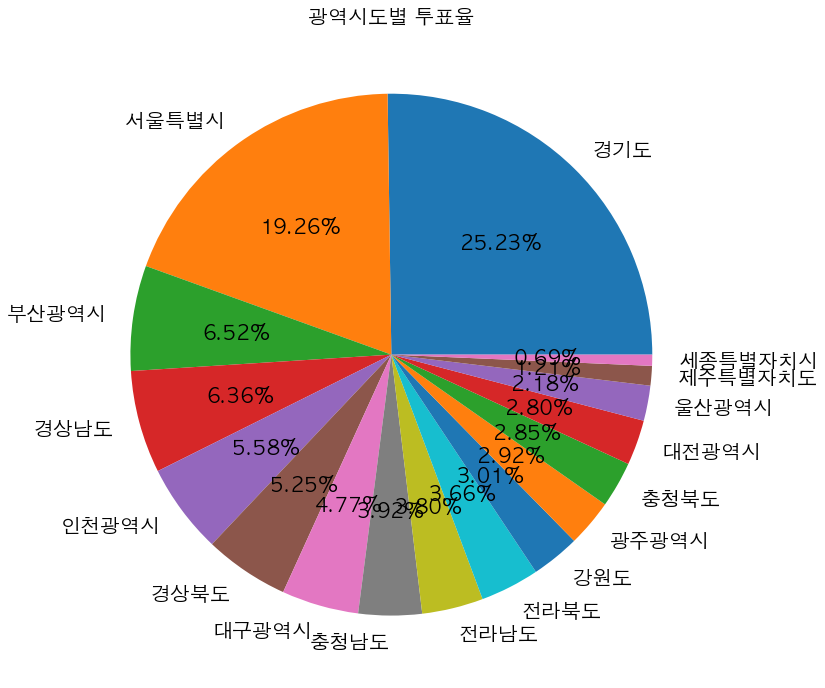

In [18]:
data = elec_sum_order['투표수']
categories = list(elec_sum_order.index)

plt.rcParams['figure.figsize'] = (12,12)
plt.rcParams['font.size'] = 20

plt.pie(
    data,
    labels=categories,
    autopct='%.2f%%'
)

plt.title("광역시도별 투표율",fontsize = 20)
plt.show()

In [19]:
# pivot을 이용하여 광역시별 윤석열 후보의 투표수를 합계로 그룹화하여 집계한다.
elec_yoon = election.pivot_table("윤석열",index='광역시도',aggfunc=sum)
elec_yoon.head()

,윤석열
광역시도,
강원도,544980
경기도,3859666
경상남도,1237346
경상북도,1278922
광주광역시,124511


In [20]:
elec_yoon_order = elec_yoon.sort_values(by='윤석열',ascending=False)
elec_yoon_order

,윤석열
광역시도,
경기도,3859666
서울특별시,3255747
경상북도,1278922
부산광역시,1270072
경상남도,1237346
대구광역시,1199888
인천광역시,878560
충청남도,670283
강원도,544980


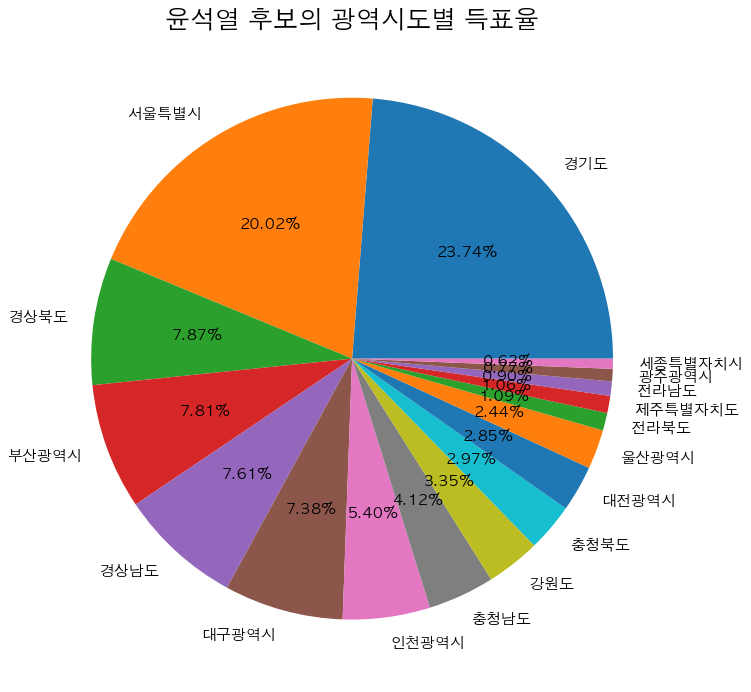

In [21]:
yoon = elec_yoon_order['윤석열']
yoon_index = list(yoon.index)

plt.rcParams['figure.figsize'] = (12,12)
plt.rcParams['font.size'] = 15

plt.pie(
    yoon,
    autopct='%.2f%%',
    labels=yoon_index
)
plt.title('윤석열 후보의 광역시도별 득표율',size=25)
plt.show()

In [22]:

elec_yoon= election.pivot_table('윤석열',index=['광역시도','시군구'],aggfunc=sum)
elec_yoon= elec_yoon.loc['서울특별시']

In [23]:
elec_yoon_order = elec_yoon.sort_values(by='윤석열',ascending=False)
yoon_top5 = elec_yoon_order[:5]
yoon_top5


,윤석열
시군구,
송파구,255166
강남구,235897
강서구,181510
서초구,179472
노원구,163340


In [24]:
etc_value = elec_yoon_order[5:].values.sum()
etc_value


2240362

In [25]:
yoon_top5.loc['기타'] = etc_value

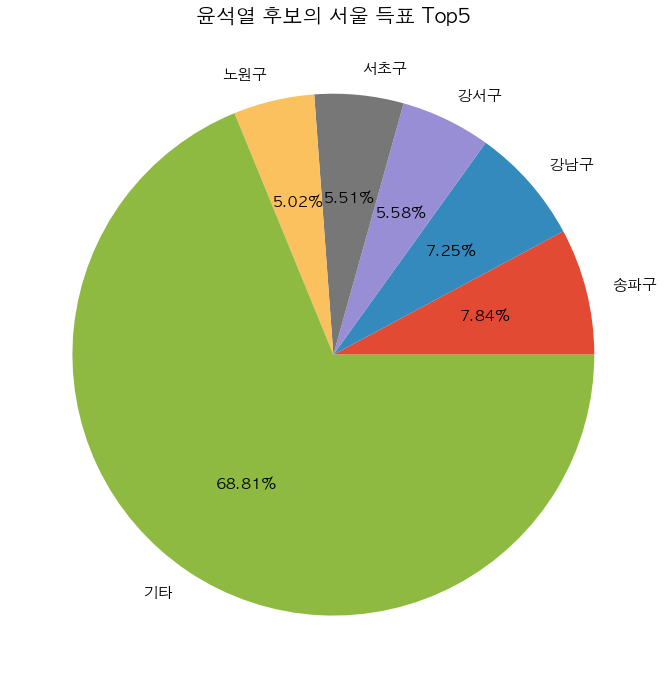

In [26]:

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,12)
plt.rcParams['font.size'] = 15

yoon_top5['윤석열'].plot(
    kind = 'pie',
    autopct = '%.2f%%',
    ylabel= ''
)

plt.title('윤석열 후보의 서울 득표 Top5',size=20)
plt.show()

---
### 대선주자 출생지별 득표율 분석
- 윤석열 후보의 출생지는 서울 특별시 성북구

In [27]:
elec_seongbuk= election.pivot_table(['윤석열','이재명','심상정'],index=['광역시도','시군구'],aggfunc='sum')
elec= elec_seongbuk.loc['서울특별시']
elec= elec.loc['성북구']
elec

심상정      8952
윤석열    135044
이재명    142702
Name: 성북구, dtype: int64

In [28]:
etc_seongbuk = election.pivot_table('투표수',index=['광역시도','시군구'],aggfunc='sum')
elec_etc = etc_seongbuk.loc['서울특별시']
elec_etc = elec_etc.loc['성북구']
elec_etc

투표수    292187
Name: 성북구, dtype: int64

In [29]:
elec.loc['기타'] = elec_etc.sum() - elec.sum()
elec

심상정      8952
윤석열    135044
이재명    142702
기타       5489
Name: 성북구, dtype: int64

In [30]:
elec = elec.loc[['윤석열','이재명','심상정','기타']]
elec

윤석열    135044
이재명    142702
심상정      8952
기타       5489
Name: 성북구, dtype: int64

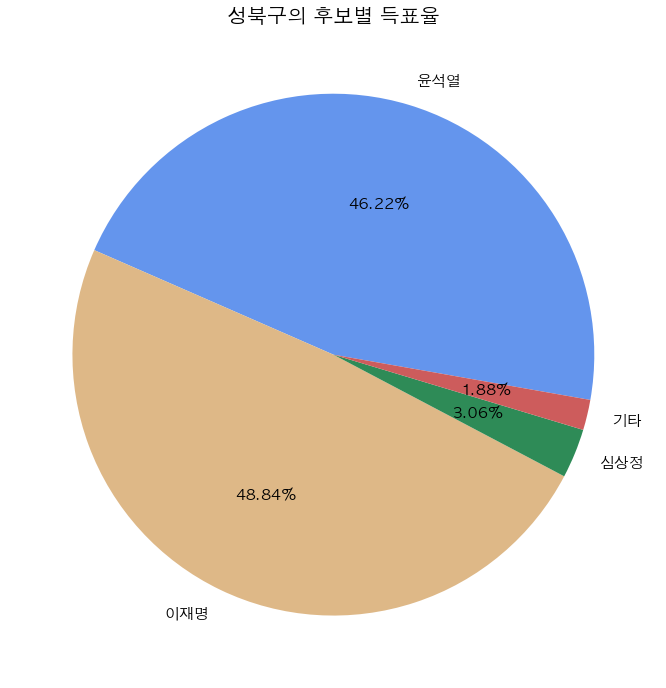

In [31]:
plt.pie(
    elec,
    labels= elec.index,
    autopct= '%.2f%%',
    startangle=-10,
    colors= ['cornflowerblue','burlywood','seagreen','indianred']
)

plt.title('성북구의 후보별 득표율',size = 20)
plt.show()

### 선생님 코드(아래)

In [32]:
pob_윤석열 = election[election['시군구']=='성북구']
pob_윤석열

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
7,서울특별시,성북구,375880,292187,142702,135044,8952,286698,98.12


In [33]:
pob_윤석열_data = pd.Series([int(pob_윤석열['윤석열']),int(pob_윤석열['이재명']),\
    int(pob_윤석열['심상정'])]).append(pob_윤석열['투표수']-pob_윤석열['electionSum']).reset_index(drop=True)
pob_윤석열_data

0    135044
1    142702
2      8952
3      5489
dtype: int64

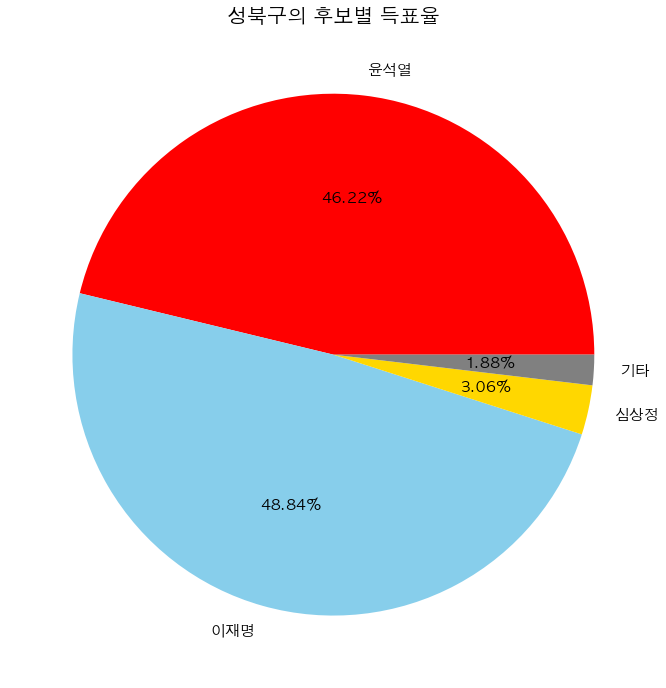

In [34]:
plt.pie(
    pob_윤석열_data,
    labels=['윤석열','이재명','심상정','기타'],
    autopct='%.2f%%',
    colors= [ 'red', '#87CEEB','gold','grey']
)

plt.title('성북구의 후보별 득표율',size=20)
plt.show()

---
### 투표수가 가장 많은 4지역(광역시도)의 각 후보별 득표수를 막대그래프로 표현하기

In [35]:
elec_top4 = election.pivot_table(['투표수','윤석열','이재명','심상정'],index='광역시도',aggfunc='sum')
elec_top4_order = elec_top4.sort_values(by='투표수',ascending=False)
elec_top4_order = elec_top4_order.head(4)
elec_top4_order

,심상정,윤석열,이재명,투표수
광역시도,,,,
경기도,201113,3859666,4297931,8518854
서울특별시,180324,3255747,2944981,6501831
부산광역시,47541,1270072,831896,2200224
경상남도,52591,1237346,794130,2146882


In [36]:
top4 = elec_top4_order[['윤석열','이재명','심상정']]
top4

,윤석열,이재명,심상정
광역시도,,,
경기도,3859666,4297931,201113
서울특별시,3255747,2944981,180324
부산광역시,1270072,831896,47541
경상남도,1237346,794130,52591


In [37]:
import seaborn as sns

In [38]:
sns.set_style('whitegrid')

In [39]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [40]:
import numpy as np

In [61]:
top4_test = top4/1000
top4_test

,윤석열,이재명,심상정
광역시도,,,
경기도,3859.666,4297.931,201.113
서울특별시,3255.747,2944.981,180.324
부산광역시,1270.072,831.896,47.541
경상남도,1237.346,794.130,52.591


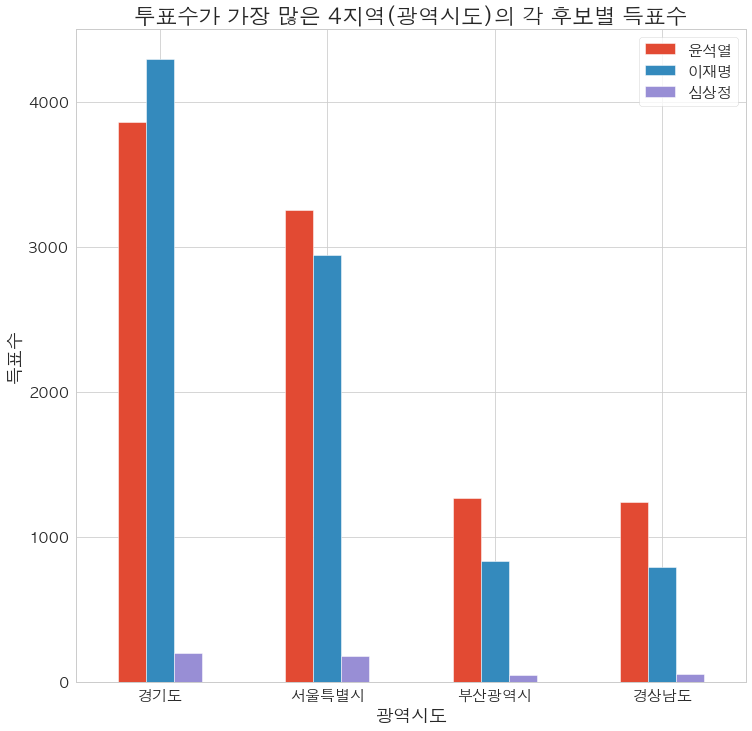

In [63]:
plt.rcParams['figure.figsize'] = (12,12)

top4_test.plot(
    kind = 'bar',

)
#plt.ticklabel_format(axis='y',useOffset=False,style='plain') # 지수 -> 일반적인 숫자
plt.ylim(0,4500)
plt.yticks(np.arange(0,5000,1000))
plt.ylabel('득표수') 
plt.xticks(rotation=0)
plt.title('투표수가 가장 많은 4지역(광역시도)의 각 후보별 득표수')
plt.show()

---
### 투표수가 높은 5군데 시군구별 후보별 득표수 나타내기

In [42]:
elec_top5 = election.pivot_table(['투표수','윤석열','이재명','심상정'],index=['광역시도','시군구'],aggfunc='sum')
elec_top5order = elec_top5.sort_values(by='투표수',ascending=False)


In [43]:
elec_top5 = elec_top5order[['윤석열','이재명','심상정']].head(5)
elec_top5

윤석열     이재명    심상정
광역시도  시군구                        
경기도   화성시   236055  283324  12955
      부천시   224331  285227  13249
      남양주시  203075  239179  10089
서울특별시 송파구   255166  180490  10652
      강서구   181510  190000  11100

In [44]:
name = []
for i in range(0,5):
    name.append(elec_top5.index[i][0] + " "+ elec_top5.index[i][1])

In [45]:
name
elec_top5.reset_index(drop=True)
elec_top5.index = name
elec_top5

,윤석열,이재명,심상정
경기도 화성시,236055,283324,12955
경기도 부천시,224331,285227,13249
경기도 남양주시,203075,239179,10089
서울특별시 송파구,255166,180490,10652
서울특별시 강서구,181510,190000,11100


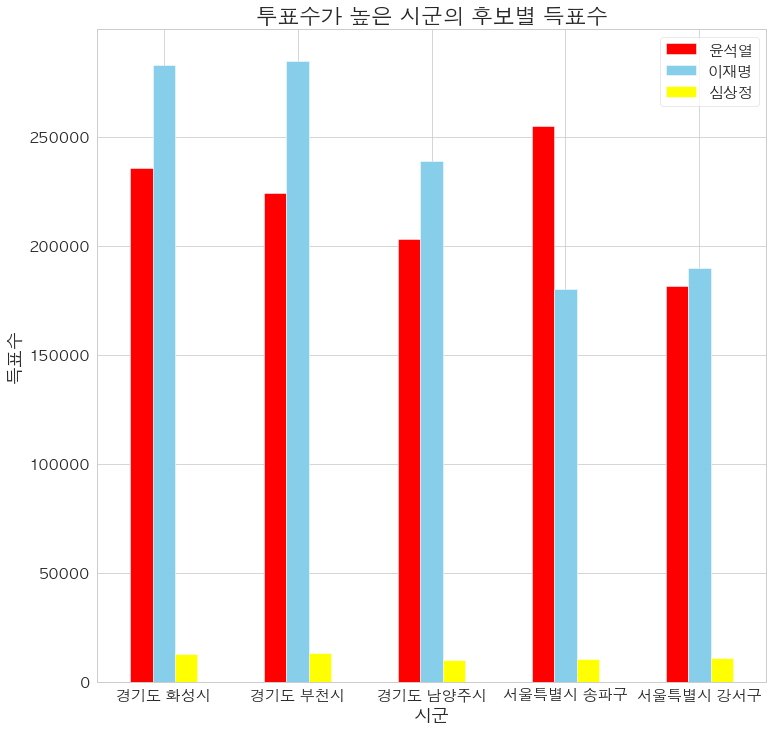

In [46]:
elec_top5.plot(
    kind='bar',
    color =['red','skyblue','yellow'],
)
plt.title('투표수가 높은 시군의 후보별 득표수')
plt.xlabel('시군')
plt.ylabel('득표수')
plt.xticks(rotation=0)
plt.savefig("../Data/투표수가 높은 시군의 후보별 득표수.png")
plt.show()